# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
import textwrap
from keras import backend
from keras import optimizers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input,Flatten,Conv2D,LeakyReLU,MaxPooling2D,Dropout,BatchNormalization


**Let us check the version of tensorflow.**

In [ ]:
tf.__version__

'2.18.0'

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [19]:
file_path = '/content/drive/My Drive/SVHN_single_grey1.h5'

ds = h5py.File(file_path, 'r')
# List all groups
print("Keys: %s" % ds.keys())

a_group_key = list(ds.keys())[0]
print(a_group_key)
print(type(ds[a_group_key]))

X_train = ds['X_train'][:]
y_train = ds['y_train'][:]

X_test = ds['X_test'][:]
y_test = ds['y_test'][:]


Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>
X_test
<class 'h5py._hl.dataset.Dataset'>


Check the number of images in the training and the testing dataset.

In [20]:
print(f'X_train.shape {X_train.shape}')
print(f'y_train.shape {y_train.shape}')

print(f'X_test.shape {X_test.shape}')
print(f'y_test.shape {y_test.shape}')

X_train.shape (42000, 32, 32)
y_train.shape (42000,)
X_test.shape (18000, 32, 32)
y_test.shape (18000,)


**Observation:**

*   The training data has 42000 images of digits
*   Each image is a grayscale pixel matrix of size 32x32
*   Each of these 42000 images have a corresponding digit label which is stored in y_train
*   The test data has 18000 images of digits
*   Each of the test image is a grayscale pixel matrix of 32x32 as well

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

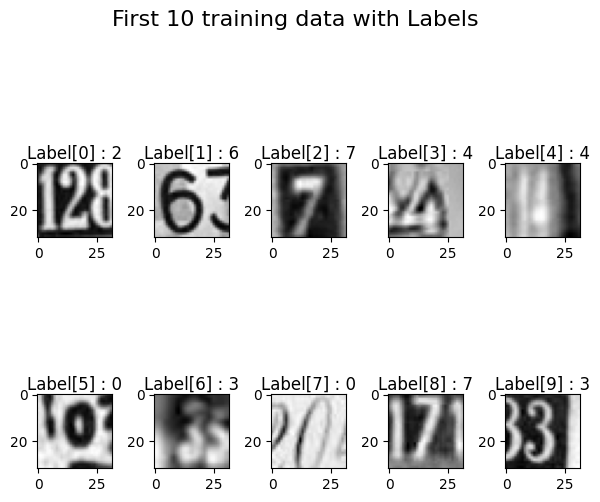

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(6, 6))

fig.suptitle("First 10 training data with Labels", fontsize=16)

for i in range(10):
    row = i // 5  # Calculate row index
    col = i % 5   # Calculate column index

    axes[row, col].imshow(X_train[i], cmap='gray')

    title = f"Label[{i}] : {y_train[i]}"
    axes[row, col].set_title(title, verticalalignment='top')  # Align to top


plt.tight_layout()
plt.show()

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [21]:
print(f'X_train[0].shape {X_train[0].shape}')

np.set_printoptions(threshold=np.inf)  # Set threshold to infinity to print all elements
print(f'X_train[0] \n {X_train[0]}')

X_train[0].shape (32, 32)
X_train[0] 
 [[ 33.0704  30.2601  26.852   25.8844  28.5421  33.1673  33.9069  31.277
   27.3313  23.9556  21.3518  22.5258  24.2868  31.2322  37.2917  38.1776
   30.8902  24.4887  27.983   23.3641  19.7774  23.0159  24.7168  24.9941
   27.5701  38.5474  52.8341  65.9037  73.5609  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765  40.96    54.0358  60.7317  57.5965  47.9611
   33.0103  24.3362  24.3793  33.1997  44.1339  61.1815  80.5278  86.1744
   79.7621  66.5893  47.4926  29.7548  21.8804  22.9943  25.2822  26.6303
   39.7923  64.9531  91.0815 108.8795 113.6079 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763  69.6815  91.8381 101.2887  97.0719  72.8832
   41.1944  23.0975  32.0319  55.8077  82.2242 104.4069 113.9329 116.5197
  117.7646 111.6512  83.8758  53.9974  32.4664  22.3256  23.4179  32.2491
   61.2093  99.8526 117.9217 117.4272 110.1398 113.3028 121.775  115.4228]
 [ 32.3478  26.8044  51.4383  87.5396 106.8321 113.38   104.0219  70.82

### **Normalize the train and the test data**

In [22]:
X_train = X_train/255
X_test = X_test/255


Print the shapes of Training and Test data

In [23]:
print(f'X_train.shape {X_train.shape}')

print(f'X_test.shape {X_test.shape}')

X_train.shape (42000, 32, 32)
X_test.shape (18000, 32, 32)


### **One-hot encode output**

In [24]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

for i in range(10) :
  print(f'y_train_encoded[{i}] :{y_train_encoded[i]}')

print(f'\n')

for i in range(10) :
  print(f'y_test_encoded[{i}]  :{y_test_encoded[i]}')

y_train_encoded[0] :[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
y_train_encoded[1] :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
y_train_encoded[2] :[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
y_train_encoded[3] :[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_train_encoded[4] :[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_train_encoded[5] :[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train_encoded[6] :[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
y_train_encoded[7] :[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train_encoded[8] :[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
y_train_encoded[9] :[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


y_test_encoded[0]  :[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y_test_encoded[1]  :[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
y_test_encoded[2]  :[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
y_test_encoded[3]  :[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
y_test_encoded[4]  :[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_test_encoded[5]  :[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
y_test_encoded[6]  :[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y_test_encoded[7]  :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
y_test_encoded[8]  :[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_test_enc

**Observation:**


*   Each element of the image 32x32 matrix in the dataset has a value in the range 0-255
*   For ease of computation the training and test data are divided by 255 so that the normalized values fall in the range of 0-1
*   As expected the shape of the matrices do not change after normalization
*   On visualizing the first 10 images from the dataset we realize that the images have multiple digits in the frame and the digits in the center of the frame are the ones that need to be used for training and that is the one that has the corresponding label as well
*   y_train and y_test have a value in the range 0-9
*   Since the output layer of neural networks needs as many neurons as the number of output classes , here 0:9 = 10 , we convert y_train and y_test to one-hot encoded values using to_categorical function of Keras

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [45]:
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
backend.clear_session()
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [46]:
# To create an ANN model

def nn_model_1():
  #create a sequential model
  ann_model = Sequential()

  #create the input layer with shape 32,32
  ann_model.add(Input(shape=(32,32)))

  #create the flatten layer
  ann_model.add(Flatten())

  #create first hidden layer with 64 nodes
  ann_model.add(Dense(units=64, activation='relu'))

  #create second hidden layer with 32 nodes and relu activation
  ann_model.add(Dense(units=32, activation='relu'))

  #create output layer with 10 nodes equal num digits 0-9
  ann_model.add(Dense(units=10, activation='softmax'))

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

  ann_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return ann_model

ann_model1 = nn_model_1()

ann_model1.summary()

ann_model1_fitHist=ann_model1.fit(X_train, y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=20)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1073 - loss: 2.3092 - val_accuracy: 0.1632 - val_loss: 2.2677
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1778 - loss: 2.2184 - val_accuracy: 0.2912 - val_loss: 2.0361
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3392 - loss: 1.9184 - val_accuracy: 0.4385 - val_loss: 1.6545
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4624 - loss: 1.6101 - val_accuracy: 0.5181 - val_loss: 1.4750
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5249 - loss: 1.4636 - val_accuracy: 0.5407 - val_loss: 1.4091
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5543 - loss: 1.3851 - val_accuracy: 0.5619 - val_loss: 1.3614
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5760 - loss: 1.3307 - val_accuracy: 0.5850 - val_loss: 1.3071
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5938 - loss: 1.2857 - val_accuracy: 0.

### **Plot the Training and Validation Accuracies and write down your Observations.**

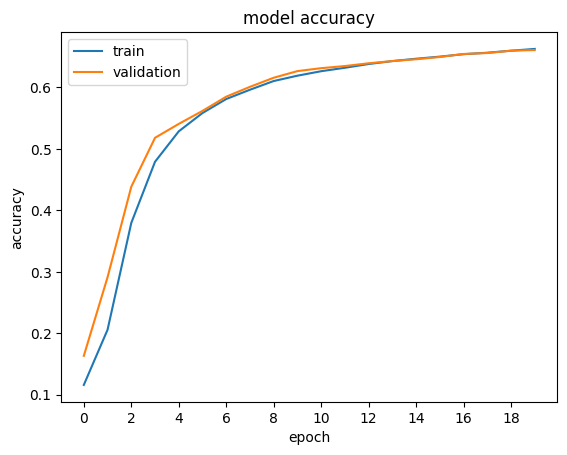

In [47]:
# Plotting the training and validation accuracies for each epoch
custom_x_values =[f'{i}' for i in range(20)]
plt.plot(custom_x_values,ann_model1_fitHist.history['accuracy'])
plt.plot(custom_x_values,ann_model1_fitHist.history['val_accuracy'])
plt.xticks(custom_x_values[::2])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:_______**

*   The Training and validation accuracies increase steadily until around epcoh 6 then start plateauing from then on
*   The final training and validation accuracy at epoch 30 is about 0.66

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [39]:
#clear backend session
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [40]:
def nn_model_2():
  #create a sequential model
  ann_model = Sequential()

  #create the input layer with input shape 32,32
  ann_model.add(Input(shape=(32,32)))

  #Add a flatten layer
  ann_model.add(Flatten())

  #create first hidden layer with 256 nodes
  ann_model.add(Dense(units=256, activation='relu'))

  #create second hidden layer with 128 nodes and relu activation
  ann_model.add(Dense(units=128, activation='relu'))

  #create the dropout layer with rate = 0.2
  ann_model.add(Dropout(0.2))

  #create third hidden layer with 64 nodes and relu activation
  ann_model.add(Dense(units=64, activation='relu'))

  #create fourth hidden layer with 64 nodes and relu activation
  ann_model.add(Dense(units=64, activation='relu'))

  #create fifth hidden layer with 32 nodes and relu activation
  ann_model.add(Dense(units=32, activation='relu'))

  #create the batch normalization layer
  ann_model.add(BatchNormalization())

  #create output layer with 10 nodes equal num digits 0-9
  ann_model.add(Dense(units=10, activation='softmax'))

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

  ann_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return ann_model

ann_model2 = nn_model_2()

ann_model2.summary()

ann_model2_fitHist=ann_model2.fit(X_train, y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=30)




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.0977 - loss: 2.4462 - val_accuracy: 0.1048 - val_loss: 2.3122
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1132 - loss: 2.3026 - val_accuracy: 0.1682 - val_loss: 2.2257
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2557 - loss: 2.0375 - val_accuracy: 0.4229 - val_loss: 1.6987
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4249 - loss: 1.6416 - val_accuracy: 0.5135 - val_loss: 1.4320
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5244 - loss: 1.4076 - val_accuracy: 0.5825 - val_loss: 1.2487
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5861 - loss: 1.2472 - val_accuracy: 0.6160 - val_loss: 1.1511
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6204 - loss: 1.1632 - val_accuracy: 0.6473 - val_loss: 1.0841
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6417 - loss: 1.1027 - val_accuracy: 0

### **Plot the Training and Validation Accuracies and write down your Observations.**

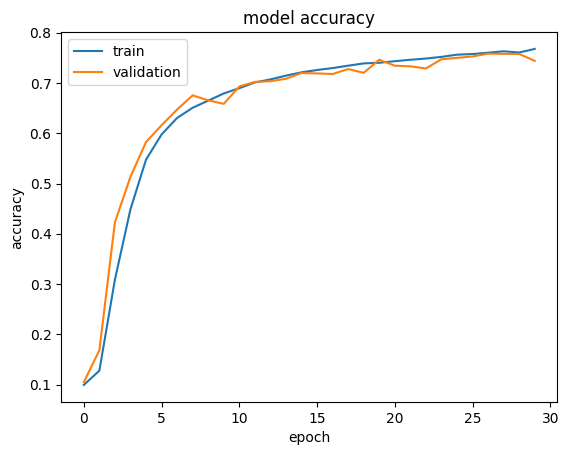

In [41]:
# Plotting the training and validation accuracies for each epoch

plt.plot(ann_model2_fitHist.history['accuracy'])
plt.plot(ann_model2_fitHist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:_______**

**Observations about model-accuracy plot**

* Both the training and validation accuracies steadily improve until epoch 6 with the validation accuracy being slightly better than the training accuracy
* Between epoch 6 and 10 there is slight improvement in training and validation accuracies. The training and validation accuracies are almost the same in this interval
* After epoch 10 the improvement in accuracies plateaus with both the final Training and Validation accuracies reaching about 0.76 and 0.74 respectively  

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [42]:
ann_model2.evaluate(X_test, y_test_encoded)

563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7493 - loss: 0.7984


[0.816921591758728, 0.746055543422699]

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

pred = ann_model2.predict(X_test)

y_test_labels = np.argmax(y_test_encoded, axis=1)
y_pred_labels = np.argmax(pred, axis=1)



563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**


Classification Report
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1814
           1       0.72      0.79      0.75      1828
           2       0.77      0.80      0.78      1803
           3       0.68      0.75      0.71      1719
           4       0.78      0.78      0.78      1812
           5       0.75      0.69      0.72      1768
           6       0.73      0.72      0.72      1832
           7       0.77      0.81      0.79      1808
           8       0.63      0.78      0.69      1812
           9       0.82      0.67      0.73      1804

    accuracy                           0.75     18000
   macro avg       0.75      0.75      0.75     18000
weighted avg       0.75      0.75      0.75     18000



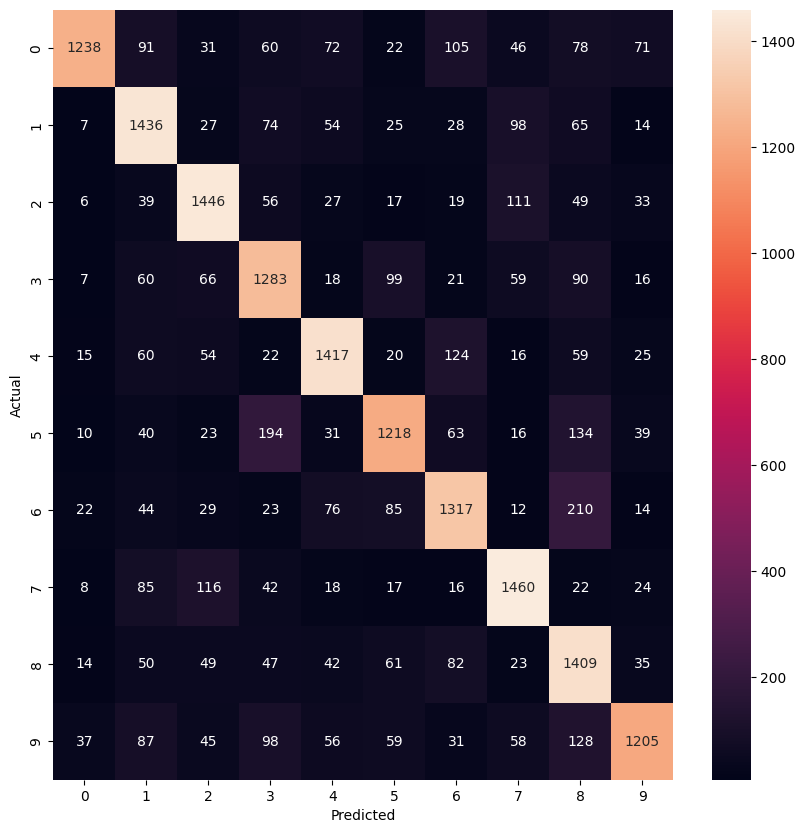

In [44]:
#Print the classification report
print()
print('Classification Report')
print(classification_report(y_test_labels, y_pred_labels))

#Plot the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels = np.arange(10), yticklabels = np.arange(10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:__________**

**Observations about predictions on test data**

* The test accuracy is about 0.75 which indicates the ANN model2 does not have an overfitting problem  

**Observations about confusion matrix**

* Based on ANN model2 confusion matrix a few numbers are confused with each other.For example, a prediction of 8 turned out to be 9 in 128 instances and in 210 instances it turned out to be 6 and in 134 instances it turned out to be 5. This results in a relatively **low precision of 0.63 for 8**
* The **precision for 0 is the highest at 0.91**, the number of False Positives being less contributes to this high precision. But the recall for 0 is relatively lower compared to precision due to high False Negatives as the model misclassified 0 as 1 on 91 instances,as 6 on 105 instances.
* The F-1 score(which is the Harmonic Mean of Precision and Accuracy) is the
highest for 7 at 0.79
* The **recall for 9 is the lowest at 0.67** as the model misclassifies 9 as 1,3,8 on 87,98 and 128 instances respectively

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [4]:
ds = h5py.File(file_path, 'r')
# List all groups
print("Keys: %s" % ds.keys())

a_group_key = list(ds.keys())[0]
print(a_group_key)
print(type(ds[a_group_key]))

X_train = ds['X_train'][:]
y_train = ds['y_train'][:]

X_test = ds['X_test'][:]
y_test = ds['y_test'][:]

Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>
X_test
<class 'h5py._hl.dataset.Dataset'>


Check the number of images in the training and the testing dataset.

In [5]:
print(f'X_train.shape {X_train.shape}')
print(f'X_test.shape {X_test.shape}')

X_train.shape (42000, 32, 32)
X_test.shape (18000, 32, 32)


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [6]:
print(f'X_train[0].shape {X_train[0].shape}')

np.set_printoptions(threshold=np.inf)  # Set threshold to infinity to print all elements
print(f'X_train[0] \n {X_train[0]}')

X_train[0].shape (32, 32)
X_train[0] 
 [[ 33.0704  30.2601  26.852   25.8844  28.5421  33.1673  33.9069  31.277
   27.3313  23.9556  21.3518  22.5258  24.2868  31.2322  37.2917  38.1776
   30.8902  24.4887  27.983   23.3641  19.7774  23.0159  24.7168  24.9941
   27.5701  38.5474  52.8341  65.9037  73.5609  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765  40.96    54.0358  60.7317  57.5965  47.9611
   33.0103  24.3362  24.3793  33.1997  44.1339  61.1815  80.5278  86.1744
   79.7621  66.5893  47.4926  29.7548  21.8804  22.9943  25.2822  26.6303
   39.7923  64.9531  91.0815 108.8795 113.6079 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763  69.6815  91.8381 101.2887  97.0719  72.8832
   41.1944  23.0975  32.0319  55.8077  82.2242 104.4069 113.9329 116.5197
  117.7646 111.6512  83.8758  53.9974  32.4664  22.3256  23.4179  32.2491
   61.2093  99.8526 117.9217 117.4272 110.1398 113.3028 121.775  115.4228]
 [ 32.3478  26.8044  51.4383  87.5396 106.8321 113.38   104.0219  70.82

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [7]:
#Reshaping the dataset to 4D for greyscale
channels = 1
X_train_rshp4d = X_train.reshape(X_train.shape[0], 32, 32, channels)
X_test_rshp4d = X_test.reshape(X_test.shape[0], 32, 32, channels)


Normalize inputs from 0-255 to 0-1

In [8]:
X_train_rshp4d = X_train_rshp4d/255
X_test_rshp4d = X_test_rshp4d/255

Print New shape of Training and Test

In [9]:
print(f'X_train_rshp4d.shape {X_train_rshp4d.shape}')
print(f'X_test_rshp4d.shape {X_test_rshp4d.shape}')

X_train_rshp4d.shape (42000, 32, 32, 1)
X_test_rshp4d.shape (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [10]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

for i in range(10) :
  print(f'y_train_encoded[{i}] :{y_train_encoded[i]}')

print(f'\n')

for i in range(10) :
  print(f'y_test_encoded[{i}]  :{y_test_encoded[i]}')

y_train_encoded[0] :[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
y_train_encoded[1] :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
y_train_encoded[2] :[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
y_train_encoded[3] :[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_train_encoded[4] :[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_train_encoded[5] :[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train_encoded[6] :[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
y_train_encoded[7] :[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train_encoded[8] :[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
y_train_encoded[9] :[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


y_test_encoded[0]  :[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y_test_encoded[1]  :[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
y_test_encoded[2]  :[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
y_test_encoded[3]  :[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
y_test_encoded[4]  :[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_test_encoded[5]  :[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
y_test_encoded[6]  :[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y_test_encoded[7]  :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
y_test_encoded[8]  :[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_test_enc

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [34]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [35]:
def cnn_model_1():
  cnn_model = Sequential(
      [
       Input(shape=(32,32,1)),
       Conv2D(filters=16, kernel_size=(3,3), padding='same'),
       LeakyReLU(negative_slope=0.1),
       Conv2D(filters=32, kernel_size=(3,3), padding='same'),
       LeakyReLU(negative_slope=0.1),
       MaxPooling2D(pool_size=(2,2)),
       Flatten(),
       Dense(32, activation='relu'),
       LeakyReLU(negative_slope=0.1),
       Dense(10, activation='softmax')
  ])

  optimizer = optimizers.Adam(learning_rate=0.001)

  cnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return cnn_model

cnn_model1 = cnn_model_1()

cnn_model1.summary()

cnn_model1_fitHist=cnn_model1.fit(X_train_rshp4d, y_train_encoded, validation_split=0.2, batch_size=32, verbose=1, epochs=20)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3733 - loss: 1.7521 - val_accuracy: 0.7873 - val_loss: 0.7076
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8174 - loss: 0.6189 - val_accuracy: 0.8250 - val_loss: 0.6042
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8520 - loss: 0.5074 - val_accuracy: 0.8431 - val_loss: 0.5550
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8701 - loss: 0.4459 - val_accuracy: 0.8488 - val_loss: 0.5411
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8826 - loss: 0.4008 - val_accuracy: 0.8561 - val_loss: 0.5288
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8929 - loss: 0.3633 - val_accuracy: 0.8610 - val_loss: 0.5144
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9048 - loss: 0.3301 - val_accuracy: 0.8621 - val_loss: 0.5181
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9133 - loss: 0.2996 -

### **Plot the Training and Validation Accuracies and Write your observations.**

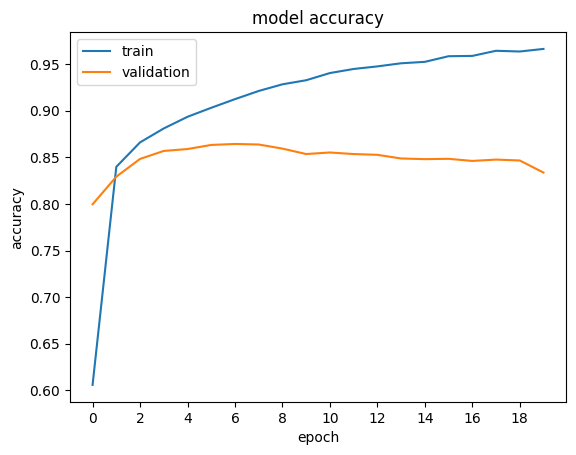

In [ ]:
custom_x_values =[f'{i}' for i in range(20)]
plt.plot(custom_x_values,cnn_model1_fitHist.history['accuracy'])
plt.plot(custom_x_values,cnn_model1_fitHist.history['val_accuracy'])
plt.xticks(custom_x_values[::2])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:__________**

*   The training accuracy for CNN model1 steeply increases until epoch 3 and then starts plateauing
*   The training accuracy at end of epoch 20 is 0.97
*   Unlike the previous ANN models the validation training lags behind the training accuracy in CNN model1 above. This could indicate that there is some overfitting happening during training. Regularization techniques like adding a Dropout layer could help address this



Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [28]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [29]:
def cnn_model_2():
  cnn_model = Sequential()

  cnn_model.add(Input(shape=(32,32,1)))
  cnn_model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same'))
  cnn_model.add(LeakyReLU(negative_slope=0.1))
  cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
  cnn_model.add(LeakyReLU(negative_slope=0.1))
  cnn_model.add(MaxPooling2D(pool_size=(2,2)))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
  cnn_model.add(LeakyReLU(negative_slope=0.1))
  cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
  cnn_model.add(LeakyReLU(negative_slope=0.1))
  cnn_model.add(MaxPooling2D(pool_size=(2,2)))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Flatten())
  cnn_model.add(Dense(32, activation='relu'))
  cnn_model.add(LeakyReLU(negative_slope=0.1))
  cnn_model.add(Dropout(0.5))
  cnn_model.add(Dense(10, activation='softmax'))

  optimizer = optimizers.Adam(learning_rate=0.001)

  cnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return cnn_model

cnn_model2 = cnn_model_2()

cnn_model2.summary()

cnn_model2_fitHist=cnn_model2.fit(X_train_rshp4d, y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         131,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.0963 - loss: 2.3465 - val_accuracy: 0.1006 - val_loss: 2.5268
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1221 - loss: 2.2648 - val_accuracy: 0.2655 - val_loss: 1.9820
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3411 - loss: 1.7378 - val_accuracy: 0.8014 - val_loss: 0.6912
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6551 - loss: 0.9952 - val_accuracy: 0.8424 - val_loss: 0.5357
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7449 - loss: 0.7709 - val_accuracy: 0.8605 - val_loss: 0.4865
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7902 - loss: 0.6421 - val_accuracy: 0.8796 - val_loss: 0.4324
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8078 - loss: 0.5798 - val_accuracy: 0.8883 - val_loss: 0.3982
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8274 - loss: 0.5290 - val_accuracy: 

### **Plot the Training and Validation accuracies and write your observations.**

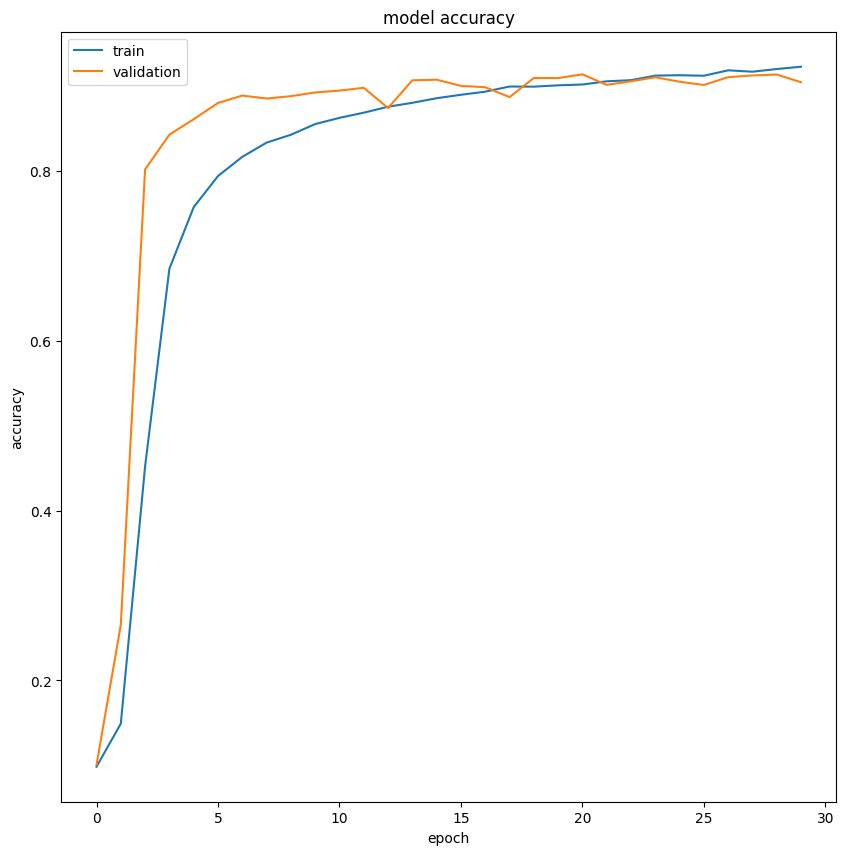

In [30]:
plt.figure(figsize=(10,10))
plt.plot(cnn_model2_fitHist.history['accuracy'])
plt.plot(cnn_model2_fitHist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:________**

* The training accuracy of CNN model2 is 0.92 which is lower than that of CNN model1(=0.97)
* But the overfitting problem of CNN model1 is not seen in model2.
* The CNN model2 has introduced more convolutional layers thereby enabling it to learn more complex features, it also has a dropout layer to prevent overfitting
* The additional max-pooling layer in CNN model2 could also be helping with reducing the overfitting problem
* The final Validation accuracy is 0.90 which is much better than CNN model1(=0.85). Better Validation accuracy is seen due to the above design factors of CNN model2

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [31]:
cnn_model2.evaluate(X_test_rshp4d, y_test_encoded)

563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9089 - loss: 0.4145


[0.4428090751171112, 0.9044444561004639]

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

pred = cnn_model2.predict(X_test_rshp4d)

y_test_labels = np.argmax(y_test_encoded, axis=1)
y_pred_labels = np.argmax(pred, axis=1)


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


### **Write your final observations on the performance of the model on the test data.**


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1814
           1       0.85      0.94      0.89      1828
           2       0.93      0.91      0.92      1803
           3       0.89      0.87      0.88      1719
           4       0.95      0.91      0.93      1812
           5       0.88      0.92      0.90      1768
           6       0.90      0.89      0.90      1832
           7       0.94      0.91      0.92      1808
           8       0.92      0.86      0.89      1812
           9       0.92      0.89      0.90      1804

    accuracy                           0.90     18000
   macro avg       0.91      0.90      0.90     18000
weighted avg       0.91      0.90      0.90     18000



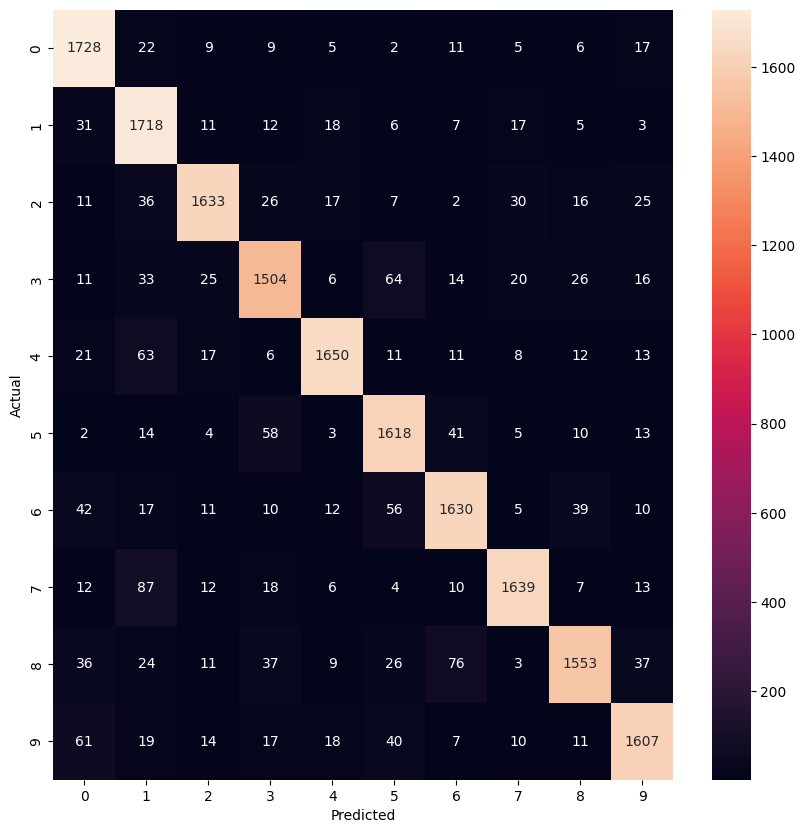

In [33]:
#Print the classification report
print()
print('Classification Report')
print(classification_report(y_test_labels, y_pred_labels))

#Plot the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels = np.arange(10), yticklabels = np.arange(10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:_________**

* The CNN model2 has a much better looking Confusion matrix compared to that of ANN model2
* None of the non-diagonal entries in the matrix (ie mispredicts) is greater than 100
* The largest mispredict count is due to 7 being mispredicted as 1(=87)  
* The precision is highest for 4 at 0.95
* The recall is relatively lower for 8(=0.86) as it was mispredicted as 6 in 76 instances
* The precision of 1 is relatively lower for 1(=0.85) as on 87 instances prediction of 1 turned out to be 7 and on 63 instances it turned out to be 4  
* The addition of Convolution layers has enabled it to learn more complex features thereby increasing the overall prediction accuracy compared to the ANN model2
* The cnn model2 is the best model due to the above reasons
* Below are some sample images of correct predictions and incorrect predictions to understand what could be the reasons for mispredictions

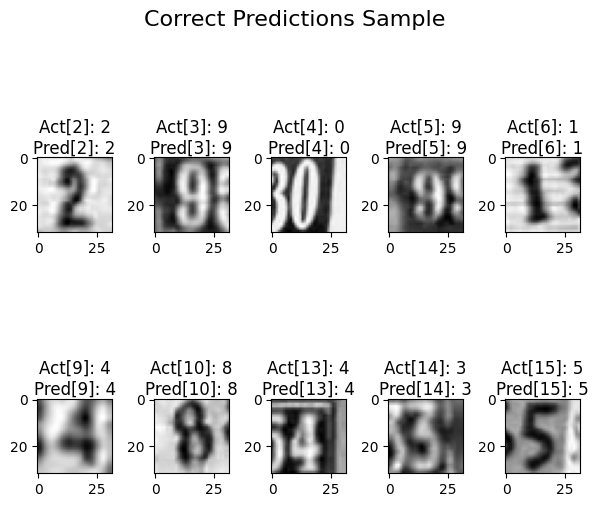

In [48]:
CorPredIdx = []  #List of Correct Prediction indices
cnt=0
for i in range(len(y_test_labels)) :
  if y_test_labels[i] == y_pred_labels[i] :
    CorPredIdx.append(i)
    cnt=cnt+1
    if cnt == 100 :
     break;

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(6, 6))
fig.suptitle("Correct Predictions Sample", fontsize=16)

for i in range(10):
    row = i // 5  # Calculate row index
    col = i % 5   # Calculate column index

    axes[row, col].imshow(X_test[CorPredIdx[i]], cmap='gray')

    # Wrap and align title
    title = f"Act[{CorPredIdx[i]}]: {y_test_labels[CorPredIdx[i]]}\nPred[{CorPredIdx[i]}]: {y_pred_labels[CorPredIdx[i]]}"
    wrapped_title = textwrap.fill(title, width=15)  # Adjust width as needed
    axes[row, col].set_title(wrapped_title, verticalalignment='top')  # Align to top


plt.tight_layout()
plt.show()



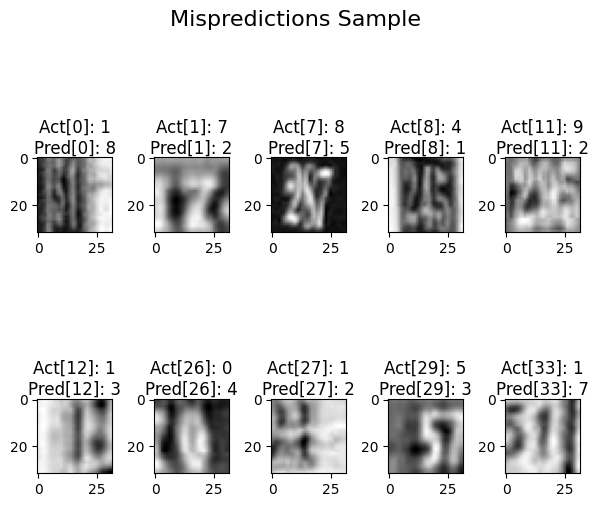

In [49]:
MisPredIdx = []  #List of Misprediction indices
cnt=0
for i in range(len(y_test_labels)) :
  if y_test_labels[i] != y_pred_labels[i] :
    MisPredIdx.append(i)
    cnt=cnt+1
    if cnt == 100 :
     break;


#random.shuffle(mispredIdx)


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(6, 6))
fig.suptitle("Mispredictions Sample", fontsize=16)

for i in range(10):
    row = i // 5  # Calculate row index
    col = i % 5   # Calculate column index

    axes[row, col].imshow(X_test[MisPredIdx[i]], cmap='gray')

    # Wrap and align title
    title = f"Act[{MisPredIdx[i]}]: {y_test_labels[MisPredIdx[i]]}\nPred[{MisPredIdx[i]}]: {y_pred_labels[MisPredIdx[i]]}"
    wrapped_title = textwrap.fill(title, width=15)  # Adjust width as needed
    axes[row, col].set_title(wrapped_title, verticalalignment='top')  # Align to top


plt.tight_layout()
plt.show()



**Conclusions from Correct prediction and misprediction samples**

*   It can be seen that in the correct prediction sample the images look more clearer to the naked eye while in the misprediction sample most of the images are blurry. The blurriness gets reflected in the image matrix and could be leading to misprediction
*   Also the digits are quite far apart in the Correct prediction sample while that is not the case in the mis-predict sample